In [ ]:
import chardet
import pandas as pd
import numpy as np
from scipy.spatial import distance
from pyproj import Transformer
from geopy.distance import geodesic
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import folium

In [ ]:
import matplotlib as mpl
mpl.rc('font', family='AppleGothic')


In [141]:
def open_with_auto_sensing_encoding_types(file_path):
    with open(file_path, 'rb') as f:
        rawdata = f.read()
        result = chardet.detect(rawdata)
        encoding_type = result['encoding']

    print(f"ÌååÏùºÏùò Ïù∏ÏΩîÎî©: {encoding_type}")
    # Í∞êÏßÄÎêú Ïù∏ÏΩîÎî©ÏúºÎ°ú ÌååÏùº ÏùΩÍ∏∞
    df = pd.read_csv(file_path, encoding=encoding_type)
    print(len(df))
    return df

In [ ]:
target_path = "/Users/yujin/Desktop/ÌååÏùº/3-1/Îç∞Ïù¥ÌÑ∞Î∂ÑÏÑù Í≥µÎ™®Ï†Ñ/codes/ÏûÖÏßÄÎ∂ÑÏÑù2/Ïú†ÏÑ±/data/preprocessed_target.csv"
taget_df = open_with_auto_sensing_encoding_types(target_path)

ÌååÏùºÏùò Ïù∏ÏΩîÎî©: utf-8
1765


In [143]:
taget_df["ÌñâÏ†ïÎèô"].value_counts()

Í¥ëÏû•Îèô     276
Ï§ëÍ≥°4Îèô    229
ÏûêÏñë2Îèô    162
Íµ¨Ïùò3Îèô    146
Íµ¨Ïùò2Îèô    137
ÌôîÏñëÎèô     118
ÏûêÏñë4Îèô    115
ÏûêÏñë3Îèô    114
Îä•Îèô      110
Íµ∞ÏûêÎèô      75
Ï§ëÍ≥°3Îèô     60
Ï§ëÍ≥°1Îèô     59
ÏûêÏñë1Îèô     57
Íµ¨Ïùò1Îèô     55
Ï§ëÍ≥°2Îèô     52
Name: ÌñâÏ†ïÎèô, dtype: int64

In [144]:

def view_distribute_and_get_mean_dist(series):
    '''
    @param:
    series (pd.Series) : ÏàòÏπòÌòï ÏãúÎ¶¨Ï¶à Îç∞Ïù¥ÌÑ∞

    Í∏∞Îä•:
    - Îç∞Ïù¥ÌÑ∞Ïùò Î∂ÑÌè¨ Í≥°ÏÑ† Ï∂úÎ†• (Seaborn KDE plot)
    - ÌèâÍ∑†Í≥º ÌëúÏ§ÄÌé∏Ï∞® Í≥ÑÏÇ∞

    @return:
    mean, std (float64) : ÌèâÍ∑†, ÌëúÏ§ÄÌé∏Ï∞®
    '''
    if not isinstance(series, pd.Series):
        raise TypeError("ÏûÖÎ†•ÏùÄ pandas.Series ÌòïÏãùÏù¥Ïñ¥Ïïº Ìï©ÎãàÎã§.")

    # ÌèâÍ∑†, ÌëúÏ§ÄÌé∏Ï∞® Í≥ÑÏÇ∞
    mean = series.mean()
    std = series.std()

    # Î∂ÑÌè¨ Í≥°ÏÑ† ÏãúÍ∞ÅÌôî
    plt.figure(figsize=(8, 4))
    sns.kdeplot(series, fill=True, color='skyblue', linewidth=2)
    plt.axvline(mean, color='red', linestyle='--', label=f'ÌèâÍ∑†: {mean:.2f}')
    plt.axvline(mean + std, color='green', linestyle='--', label=f'ÌèâÍ∑†+ÌëúÏ§ÄÌé∏Ï∞®: {mean + std:.2f}')
    plt.axvline(mean - std, color='green', linestyle='--', label=f'ÌèâÍ∑†-ÌëúÏ§ÄÌé∏Ï∞®: {mean - std:.2f}')
    plt.title("Îç∞Ïù¥ÌÑ∞ Î∂ÑÌè¨ Í≥°ÏÑ†")
    plt.xlabel("Í∞í")
    plt.ylabel("Î∞ÄÎèÑ")
    plt.legend()
    plt.grid(True)
    plt.show()

    return mean, std


In [145]:
taget_df.columns

Index(['Unnamed: 0', 'ÌñâÏ†ïÎèô', 'Í≤ΩÎèÑ', 'ÏúÑÎèÑ', 'subway_ÏµúÏÜåÍ±∞Î¶¨(m)', '500mÏßÄÌïòÏ≤†Ïó≠Í∞úÏàò',
       'bus_ÏµúÏÜåÍ±∞Î¶¨(m)', '500mÎ≤ÑÏä§Ï†ïÎ•òÏû•Í∞úÏàò', 'badplace_ÏµúÏÜåÍ±∞Î¶¨(m)', '500mÏà†ÏßëÍ∞úÏàò',
       'child_protection_ÏµúÏÜåÍ±∞Î¶¨(m)', '300mÎ≥¥Ìò∏Íµ¨Ïó≠Í∞úÏàò', 'accident_ÏµúÏÜåÍ±∞Î¶¨(m)',
       '200mÎÇ¥ÏúÑÌóòÍµ¨Ïó≠Í∞úÏàò', 'parking_ÏµúÏÜåÍ±∞Î¶¨(m)', '500ÎÇ¥Ï£ºÏ∞®Ïû•Í∞úÏàò'],
      dtype='object')

# Îç∞Ïù¥ÌÑ∞Î∂ÑÏÑù

## Í∞ÑÎã®ÌïòÍ≤å Î™®Îì† Îç∞Ïù¥ÌÑ∞Ïùò Î∂ÑÌè¨ Î∞è ÌëúÏ§ÄÌé∏Ï∞® ÌôïÏù∏Ìï¥Î≥¥Í∏∞

/Users/yujin/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 48128 (\N{HANGUL SYLLABLE MIL}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/yujin/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 46020 (\N{HANGUL SYLLABLE DO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/yujin/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 45936 (\N{HANGUL SYLLABLE DE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/yujin/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 51060 (\N{HANGUL SYLLABLE I}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/yujin/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 53552 (\N{HANGUL SYLLABLE TEO}) missing from current font.
  fig.canvas.print_figure(

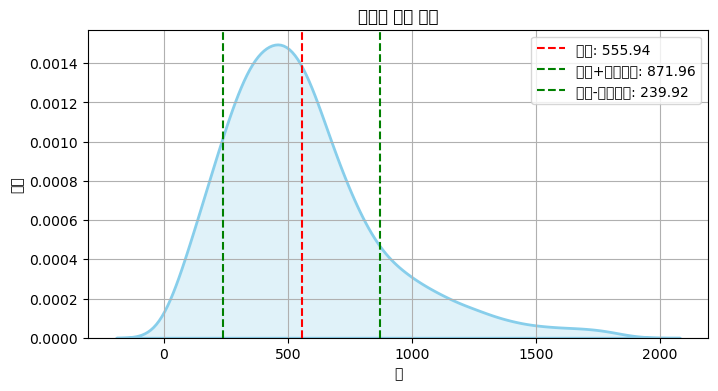

/Users/yujin/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 48128 (\N{HANGUL SYLLABLE MIL}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/yujin/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 46020 (\N{HANGUL SYLLABLE DO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/yujin/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 45936 (\N{HANGUL SYLLABLE DE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/yujin/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 51060 (\N{HANGUL SYLLABLE I}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/yujin/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 53552 (\N{HANGUL SYLLABLE TEO}) missing from current font.
  fig.canvas.print_figure(

[subway_ÏµúÏÜåÍ±∞Î¶¨(m)] ‚Üí mean : 555.94, std : 316.02



/Users/yujin/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 54217 (\N{HANGUL SYLLABLE PYEONG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/yujin/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 44512 (\N{HANGUL SYLLABLE GYUN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/yujin/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 54364 (\N{HANGUL SYLLABLE PYO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/yujin/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 51456 (\N{HANGUL SYLLABLE JUN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/yujin/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 54200 (\N{HANGUL SYLLABLE PYEON}) missing from current font.
  fig.canvas.pri

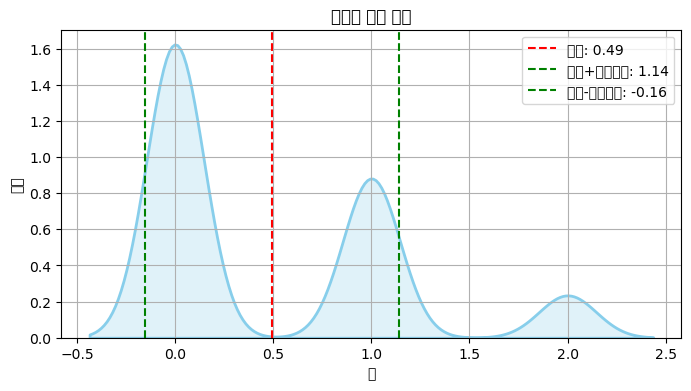

ÏßÄÌïòÏ≤†Ïó≠Í∞úÏàò] ‚Üí mean : 0.49, std : 0.65



/Users/yujin/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 48128 (\N{HANGUL SYLLABLE MIL}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/yujin/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 46020 (\N{HANGUL SYLLABLE DO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/yujin/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 45936 (\N{HANGUL SYLLABLE DE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/yujin/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 51060 (\N{HANGUL SYLLABLE I}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/yujin/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 53552 (\N{HANGUL SYLLABLE TEO}) missing from current font.
  fig.canvas.print_figure(

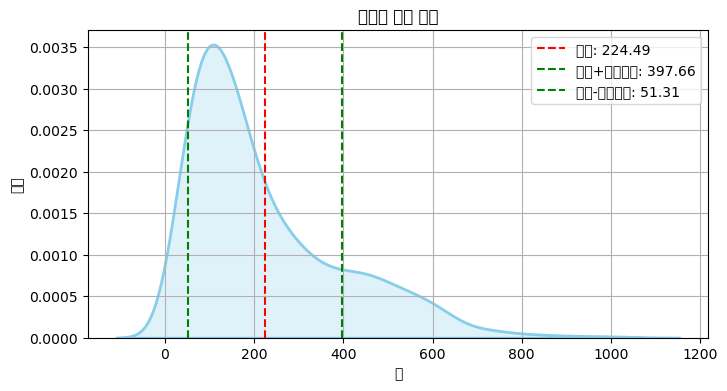

[bus_ÏµúÏÜåÍ±∞Î¶¨(m)] ‚Üí mean : 224.49, std : 173.17



/Users/yujin/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 48128 (\N{HANGUL SYLLABLE MIL}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/yujin/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 46020 (\N{HANGUL SYLLABLE DO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/yujin/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 45936 (\N{HANGUL SYLLABLE DE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/yujin/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 51060 (\N{HANGUL SYLLABLE I}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/yujin/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 53552 (\N{HANGUL SYLLABLE TEO}) missing from current font.
  fig.canvas.print_figure(

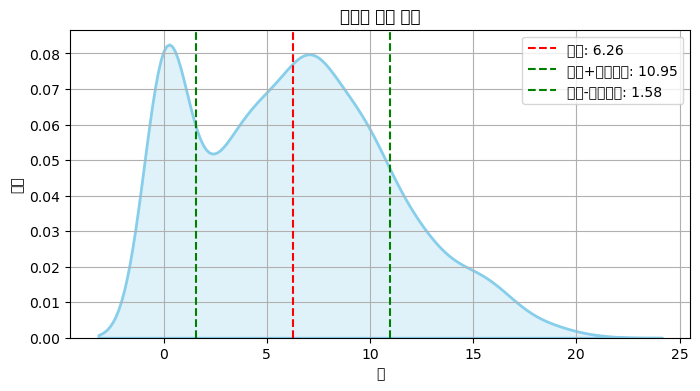

Î≤ÑÏä§Ï†ïÎ•òÏû•Í∞úÏàò] ‚Üí mean : 6.26, std : 4.69



/Users/yujin/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 48128 (\N{HANGUL SYLLABLE MIL}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/yujin/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 46020 (\N{HANGUL SYLLABLE DO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/yujin/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 45936 (\N{HANGUL SYLLABLE DE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/yujin/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 51060 (\N{HANGUL SYLLABLE I}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/yujin/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 53552 (\N{HANGUL SYLLABLE TEO}) missing from current font.
  fig.canvas.print_figure(

[badplace_ÏµúÏÜåÍ±∞Î¶¨(m)] ‚Üí mean : 233.01, std : 224.75



/Users/yujin/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 48128 (\N{HANGUL SYLLABLE MIL}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/yujin/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 46020 (\N{HANGUL SYLLABLE DO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/yujin/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 45936 (\N{HANGUL SYLLABLE DE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/yujin/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 51060 (\N{HANGUL SYLLABLE I}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/yujin/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 53552 (\N{HANGUL SYLLABLE TEO}) missing from current font.
  fig.canvas.print_figure(

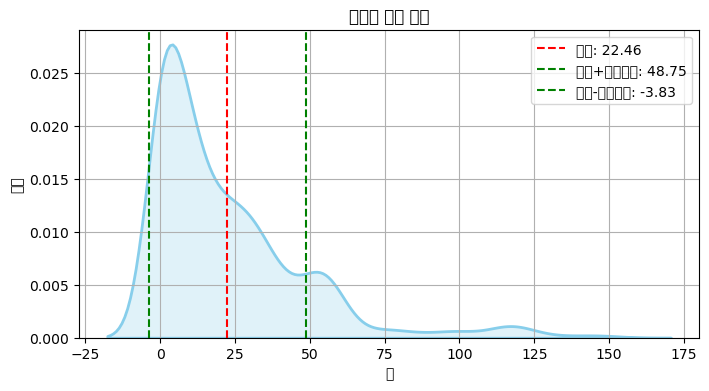

Ïà†ÏßëÍ∞úÏàò] ‚Üí mean : 22.46, std : 26.29



/Users/yujin/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 48128 (\N{HANGUL SYLLABLE MIL}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/yujin/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 46020 (\N{HANGUL SYLLABLE DO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/yujin/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 45936 (\N{HANGUL SYLLABLE DE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/yujin/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 51060 (\N{HANGUL SYLLABLE I}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/yujin/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 53552 (\N{HANGUL SYLLABLE TEO}) missing from current font.
  fig.canvas.print_figure(

[child_protection_ÏµúÏÜåÍ±∞Î¶¨(m)] ‚Üí mean : 320.94, std : 241.29



/Users/yujin/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 48128 (\N{HANGUL SYLLABLE MIL}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/yujin/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 46020 (\N{HANGUL SYLLABLE DO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/yujin/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 45936 (\N{HANGUL SYLLABLE DE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/yujin/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 51060 (\N{HANGUL SYLLABLE I}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/yujin/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 53552 (\N{HANGUL SYLLABLE TEO}) missing from current font.
  fig.canvas.print_figure(

Î≥¥Ìò∏Íµ¨Ïó≠Í∞úÏàò] ‚Üí mean : 1.04, std : 1.26



/Users/yujin/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 48128 (\N{HANGUL SYLLABLE MIL}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/yujin/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 46020 (\N{HANGUL SYLLABLE DO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/yujin/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 45936 (\N{HANGUL SYLLABLE DE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/yujin/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 51060 (\N{HANGUL SYLLABLE I}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/yujin/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 53552 (\N{HANGUL SYLLABLE TEO}) missing from current font.
  fig.canvas.print_figure(

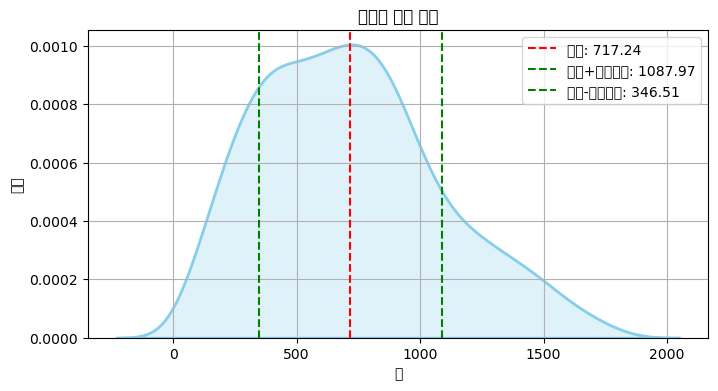

[accident_ÏµúÏÜåÍ±∞Î¶¨(m)] ‚Üí mean : 717.24, std : 370.73



/Users/yujin/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 48128 (\N{HANGUL SYLLABLE MIL}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/yujin/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 46020 (\N{HANGUL SYLLABLE DO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/yujin/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 45936 (\N{HANGUL SYLLABLE DE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/yujin/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 51060 (\N{HANGUL SYLLABLE I}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/yujin/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 53552 (\N{HANGUL SYLLABLE TEO}) missing from current font.
  fig.canvas.print_figure(

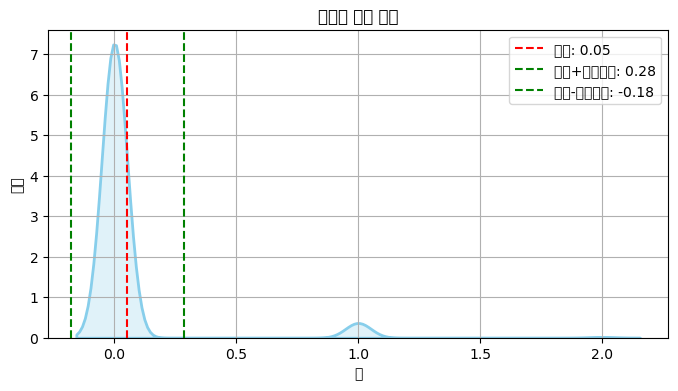

ÎÇ¥ÏúÑÌóòÍµ¨Ïó≠Í∞úÏàò] ‚Üí mean : 0.05, std : 0.23



/Users/yujin/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 48128 (\N{HANGUL SYLLABLE MIL}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/yujin/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 46020 (\N{HANGUL SYLLABLE DO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/yujin/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 45936 (\N{HANGUL SYLLABLE DE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/yujin/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 51060 (\N{HANGUL SYLLABLE I}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/yujin/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 53552 (\N{HANGUL SYLLABLE TEO}) missing from current font.
  fig.canvas.print_figure(

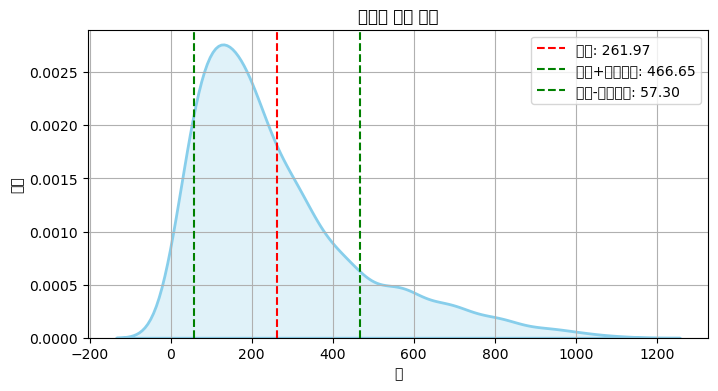

[parking_ÏµúÏÜåÍ±∞Î¶¨(m)] ‚Üí mean : 261.97, std : 204.68



/Users/yujin/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 48128 (\N{HANGUL SYLLABLE MIL}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/yujin/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 46020 (\N{HANGUL SYLLABLE DO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/yujin/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 45936 (\N{HANGUL SYLLABLE DE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/yujin/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 51060 (\N{HANGUL SYLLABLE I}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/yujin/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 53552 (\N{HANGUL SYLLABLE TEO}) missing from current font.
  fig.canvas.print_figure(

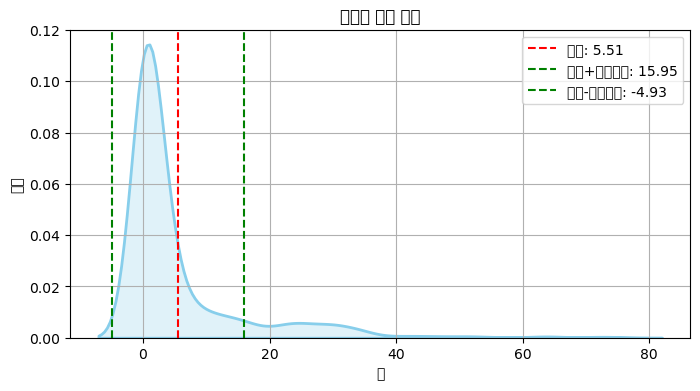

[500ÎÇ¥Ï£ºÏ∞®Ïû•Í∞úÏàò] ‚Üí mean : 5.51, std : 10.44



In [146]:
columns = [
    'subway_ÏµúÏÜåÍ±∞Î¶¨(m)', '500mÏßÄÌïòÏ≤†Ïó≠Í∞úÏàò',
    'bus_ÏµúÏÜåÍ±∞Î¶¨(m)', '500mÎ≤ÑÏä§Ï†ïÎ•òÏû•Í∞úÏàò',
    'badplace_ÏµúÏÜåÍ±∞Î¶¨(m)', '500mÏà†ÏßëÍ∞úÏàò',
    'child_protection_ÏµúÏÜåÍ±∞Î¶¨(m)', '300mÎ≥¥Ìò∏Íµ¨Ïó≠Í∞úÏàò',
    'accident_ÏµúÏÜåÍ±∞Î¶¨(m)', '200mÎÇ¥ÏúÑÌóòÍµ¨Ïó≠Í∞úÏàò',
    'parking_ÏµúÏÜåÍ±∞Î¶¨(m)', '500ÎÇ¥Ï£ºÏ∞®Ïû•Í∞úÏàò'
]

mean_list = []
std_list = []

for col in columns:
    mean, std = view_distribute_and_get_mean_dist(taget_df[col])
    mean_list.append(mean)
    std_list.append(std)
    print(f"[{col}] ‚Üí mean : {mean:.2f}, std : {std:.2f}\n")


In [147]:
print(taget_df.head(3))

   Unnamed: 0   ÌñâÏ†ïÎèô          Í≤ΩÎèÑ         ÏúÑÎèÑ  subway_ÏµúÏÜåÍ±∞Î¶¨(m)  500mÏßÄÌïòÏ≤†Ïó≠Í∞úÏàò  \
0           0  ÏûêÏñë4Îèô  127.057131  37.529359      943.105681           0   
1           1  ÏûêÏñë4Îèô  127.058268  37.528462      827.611715           0   
2           2  ÏûêÏñë4Îèô  127.058263  37.529363      818.040769           0   

   bus_ÏµúÏÜåÍ±∞Î¶¨(m)  500mÎ≤ÑÏä§Ï†ïÎ•òÏû•Í∞úÏàò  badplace_ÏµúÏÜåÍ±∞Î¶¨(m)  500mÏà†ÏßëÍ∞úÏàò  \
0   658.159095            0        678.069180         0   
1   636.487794            0        580.961545         0   
2   584.165586            0        566.033273         1   

   child_protection_ÏµúÏÜåÍ±∞Î¶¨(m)  300mÎ≥¥Ìò∏Íµ¨Ïó≠Í∞úÏàò  accident_ÏµúÏÜåÍ±∞Î¶¨(m)  200mÎÇ¥ÏúÑÌóòÍµ¨Ïó≠Í∞úÏàò  \
0               1283.829239           0       1148.133137            0   
1               1178.187396           0       1028.175732            0   
2               1161.653603           0       1022.444612            0   

   parking_ÏµúÏÜåÍ±∞Î¶¨(m)  500ÎÇ¥Ï£º

### Îç∞Ïù¥ÌÑ∞Îì§Ïùò ÌëúÏ§ÄÌé∏Ï∞®Í∞Ä Î™®ÎëêÎã§ ÌÅ∞ Ìé∏Ïù¥Îã§

#### ÏßÄÌïòÏ≤†Ïó≠ Í¥ÄÎ†®
[subway_ÏµúÏÜåÍ±∞Î¶¨(m)] ‚Üí mean : 555.94, std : 316.02

[500mÏßÄÌïòÏ≤†Ïó≠Í∞úÏàò] ‚Üí mean : 0.49, std : 0.65

- [500mÏßÄÌïòÏ≤†Ïó≠Í∞úÏàò] Ï†úÍ±∞

#### Î≤ÑÏä§Ï†ïÎ•òÏû• Í¥ÄÎ†®
[bus_ÏµúÏÜåÍ±∞Î¶¨(m)] ‚Üí mean : 224.49, std : 173.17

[500mÎ≤ÑÏä§Ï†ïÎ•òÏû•Í∞úÏàò] ‚Üí mean : 6.26, std : 4.69

- Í∑∏ÎåÄÎ°ú ÏÇ¨Ïö©

#### Ïú†Ìï¥ÏãúÏÑ§ Í¥ÄÎ†®
[badplace_ÏµúÏÜåÍ±∞Î¶¨(m)] ‚Üí mean : 233.01, std : 224.75

[500mÏà†ÏßëÍ∞úÏàò] ‚Üí mean : 22.46, std : 26.29

- Í∑∏ÎåÄÎ°ú ÏÇ¨Ïö©

#### Ïñ¥Î¶∞Ïù¥ Î≥¥Ìò∏Íµ¨Ïó≠ Í¥ÄÎ†®
[child_protection_ÏµúÏÜåÍ±∞Î¶¨(m)] ‚Üí mean : 320.94, std : 241.29

[300mÎ≥¥Ìò∏Íµ¨Ïó≠Í∞úÏàò] ‚Üí mean : 1.04, std : 1.26

- child_protection_ÏµúÏÜåÍ±∞Î¶¨(m) Ïó¥ Ï†úÍ±∞, 300mÎÇ¥ 0Í∞ú :0, 300mÎÇ¥ 1Í∞ú Ïù¥ÏÉÅ : 1 Î°ú ÎùºÎ≤®ÎßÅ

#### ÏÇ¨Í≥†Îã§Î∞úÏßÄÏ†ê Í¥ÄÎ†®
[accident_ÏµúÏÜåÍ±∞Î¶¨(m)] ‚Üí mean : 717.24, std : 370.73

[200mÎÇ¥ÏúÑÌóòÍµ¨Ïó≠Í∞úÏàò] ‚Üí mean : 0.05, std : 0.23

- accident_ÏµúÏÜåÍ±∞Î¶¨(m) Ïó¥ Ï†úÍ±∞, 200mÎÇ¥ 0Í∞ú :0, 300mÎÇ¥ 1Í∞ú Ïù¥ÏÉÅ : 1 Î°ú ÎùºÎ≤®ÎßÅ

#### Ï£ºÏ∞®Ïû• Í¥ÄÎ†®
[parking_ÏµúÏÜåÍ±∞Î¶¨(m)] ‚Üí mean : 261.97, std : 204.68

[500ÎÇ¥Ï£ºÏ∞®Ïû•Í∞úÏàò] ‚Üí mean : 5.51, std : 10.44


In [148]:
import pandas as pd

# ÏòàÏãúÎ°ú target_dfÎ•º Î∂àÎü¨ÏôîÎã§Í≥† Í∞ÄÏ†ï (ÎÑ§Í∞Ä Îî∞Î°ú Î∂àÎü¨Ïò§Î©¥ Ïù¥ Î∂ÄÎ∂ÑÏùÄ ÏÉùÎûµÌï¥ÎèÑ Îê®)
# target_df = pd.read_csv("your_file.csv")

# 1. Ïñ¥Î¶∞Ïù¥ Î≥¥Ìò∏Íµ¨Ïó≠ Í¥ÄÎ†® Ï†ÑÏ≤òÎ¶¨
# 'child_protection_ÏµúÏÜåÍ±∞Î¶¨(m)' Ï†úÍ±∞
taget_df.drop(columns=['child_protection_ÏµúÏÜåÍ±∞Î¶¨(m)'], inplace=True)

# '300mÎ≥¥Ìò∏Íµ¨Ïó≠Í∞úÏàò'Î•º 0Ïù¥Î©¥ 0, 1 Ïù¥ÏÉÅÏù¥Î©¥ 1Î°ú Ïù¥ÏßÑ ÎùºÎ≤®ÎßÅ
taget_df['300mÎ≥¥Ìò∏Íµ¨Ïó≠Ïó¨Î∂Ä'] = (taget_df['300mÎ≥¥Ìò∏Íµ¨Ïó≠Í∞úÏàò'] >= 1).astype(int)
taget_df.drop(columns=['300mÎ≥¥Ìò∏Íµ¨Ïó≠Í∞úÏàò'], inplace=True)

# 2. ÏÇ¨Í≥†Îã§Î∞úÏßÄÏ†ê Í¥ÄÎ†® Ï†ÑÏ≤òÎ¶¨
# 'accident_ÏµúÏÜåÍ±∞Î¶¨(m)' Ï†úÍ±∞
taget_df.drop(columns=['accident_ÏµúÏÜåÍ±∞Î¶¨(m)'], inplace=True)

# '200mÎÇ¥ÏúÑÌóòÍµ¨Ïó≠Í∞úÏàò'Î•º 0Ïù¥Î©¥ 0, 1 Ïù¥ÏÉÅÏù¥Î©¥ 1Î°ú Ïù¥ÏßÑ ÎùºÎ≤®ÎßÅ
taget_df['200mÏúÑÌóòÍµ¨Ïó≠Ïó¨Î∂Ä'] = (taget_df['200mÎÇ¥ÏúÑÌóòÍµ¨Ïó≠Í∞úÏàò'] >= 1).astype(int)
taget_df.drop(columns=['200mÎÇ¥ÏúÑÌóòÍµ¨Ïó≠Í∞úÏàò'], inplace=True)

# Í≤∞Í≥º ÌôïÏù∏
taget_df.head()


Unnamed: 0   ÌñâÏ†ïÎèô          Í≤ΩÎèÑ         ÏúÑÎèÑ  subway_ÏµúÏÜåÍ±∞Î¶¨(m)  500mÏßÄÌïòÏ≤†Ïó≠Í∞úÏàò  \
0           0  ÏûêÏñë4Îèô  127.057131  37.529359      943.105681           0   
1           1  ÏûêÏñë4Îèô  127.058268  37.528462      827.611715           0   
2           2  ÏûêÏñë4Îèô  127.058263  37.529363      818.040769           0   
3           3  ÏûêÏñë4Îèô  127.058257  37.530265      812.868007           0   
4           4  ÏûêÏñë4Îèô  127.058252  37.531166      812.177464           0   

   bus_ÏµúÏÜåÍ±∞Î¶¨(m)  500mÎ≤ÑÏä§Ï†ïÎ•òÏû•Í∞úÏàò  badplace_ÏµúÏÜåÍ±∞Î¶¨(m)  500mÏà†ÏßëÍ∞úÏàò  parking_ÏµúÏÜåÍ±∞Î¶¨(m)  \
0   658.159095            0        678.069180         0       550.087297   
1   636.487794            0        580.961545         0       489.745395   
2   584.165586            0        566.033273         1       448.508335   
3   533.568661            0        550.211772         1       412.046497   
4   485.237012            0        504.338347         1       381.033788   

   500ÎÇ¥Ï£ºÏ∞®Ïû•Í∞úÏàò  300mÎ≥¥Ìò∏Íµ¨Ïó≠Ïó¨Î∂Ä  200mÏúÑÌóòÍµ¨Ïó≠Ïó¨Î∂Ä  
0          0           0           0  
1          0           0           0  
2          0           0           0  
3          0           0           0  
4          0           0           0

In [149]:
df_gwangjang = taget_df[taget_df['ÌñâÏ†ïÎèô'] == 'ÏûêÏñë2Îèô'].copy()

# Î∂ÑÏÑùÏóê ÏÇ¨Ïö©Ìï† Ï£ºÏöî Î≥ÄÏàò Î™©Î°ù
features = ['subway_ÏµúÏÜåÍ±∞Î¶¨(m)',
            'bus_ÏµúÏÜåÍ±∞Î¶¨(m)', '500mÎ≤ÑÏä§Ï†ïÎ•òÏû•Í∞úÏàò',
            'badplace_ÏµúÏÜåÍ±∞Î¶¨(m)', '500mÏà†ÏßëÍ∞úÏàò',
            'parking_ÏµúÏÜåÍ±∞Î¶¨(m)', '500ÎÇ¥Ï£ºÏ∞®Ïû•Í∞úÏàò',
            '300mÎ≥¥Ìò∏Íµ¨Ïó≠Ïó¨Î∂Ä', '200mÏúÑÌóòÍµ¨Ïó≠Ïó¨Î∂Ä'
            ]

# Ï£ºÏöî Î≥ÄÏàòÎßå Ï∂îÏ∂ú
X = df_gwangjang[features].values

# Îç∞Ïù¥ÌÑ∞ ÌëúÏ§ÄÌôî (StandardScaler ÏÇ¨Ïö©)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# ÏÇ¨Í≥†Îã§Î∞úÏßÄÏó≠ Í¥ÄÎ†® Î≥ÄÏàòÏóê Í∞ÄÏ§ëÏπò Î∂ÄÏó¨ (Ï§ëÏöîÎèÑ ÎÜíÏù¥Í∏∞ ÏúÑÌï¥ Îëê Î∞∞Î°ú ÌôïÎåÄ)
accident_indices = [features.index('300mÎ≥¥Ìò∏Íµ¨Ïó≠Ïó¨Î∂Ä'), features.index('200mÏúÑÌóòÍµ¨Ïó≠Ïó¨Î∂Ä')]
X_scaled[:, accident_indices] *= 2.0

/Users/yujin/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 52509 (\N{HANGUL SYLLABLE CONG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/yujin/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 51228 (\N{HANGUL SYLLABLE JE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/yujin/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 44273 (\N{HANGUL SYLLABLE GOB}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/yujin/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 44144 (\N{HANGUL SYLLABLE GEO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/yujin/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 47532 (\N{HANGUL SYLLABLE RI}) missing from current font.
  fig.canvas.print_figu

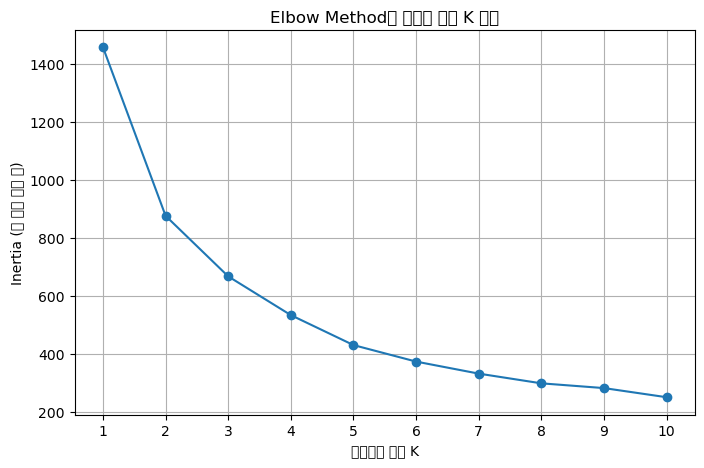

In [150]:
# ÌëúÏ§ÄÌôî
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Elbow method: Íµ∞Ïßë ÏàòÏóê Îî∞Î•∏ inertia Í≥ÑÏÇ∞
inertias = []
K_range = range(1, 11)
for k in K_range:
    kmeans = KMeans(n_clusters=k, n_init=10, random_state=42)
    kmeans.fit(X_scaled)
    inertias.append(kmeans.inertia_)

# Í∑∏ÎûòÌîÑ ÏãúÍ∞ÅÌôî
plt.figure(figsize=(8, 5))
plt.plot(K_range, inertias, marker='o')
plt.xticks(K_range)
plt.xlabel('ÌÅ¥Îü¨Ïä§ÌÑ∞ Í∞úÏàò K')
plt.ylabel('Inertia (Ï¥ù Ï†úÍ≥± Í±∞Î¶¨ Ìï©)')
plt.title('Elbow MethodÎ•º Ïù¥Ïö©Ìïú ÏµúÏ†Å K ÌÉêÏÉâ')
plt.grid(True)
plt.show()


In [151]:

# ÏµúÏ†Å Íµ∞Ïßë Ïàò Í≤∞Ï†ï: ÏóòÎ≥¥Ïö∞ÏôÄ Ïã§Î£®Ïó£ Í≥ÑÏÇ∞
inertias = []
sil_scores = []
K_range = range(2, 11)
for k in K_range:
    kmeans_temp = KMeans(n_clusters=k, n_init=10, random_state=42)
    labels_temp = kmeans_temp.fit_predict(X_scaled)
    inertias.append(kmeans_temp.inertia_)
    score = silhouette_score(X_scaled, labels_temp)
    sil_scores.append(score)
    print("ÌÅ¥Îü¨Ïä§ÌÑ∞ Í∞ØÏàò : ", k , " silhouette_score :", score)

# (inertias Î¶¨Ïä§Ìä∏ÏôÄ sil_scores Î¶¨Ïä§Ìä∏Î•º Ïù¥Ïö©Ìï¥ Í∑∏ÎûòÌîÑÎ•º Í∑∏Î†§ ÏóòÎ≥¥Ïö∞ ÌòïÌÉúÏôÄ Ïã§Î£®Ïó£ Ï†êÏàò Î≥ÄÌôîÎ•º Î∂ÑÏÑù)

ÌÅ¥Îü¨Ïä§ÌÑ∞ Í∞ØÏàò :  2  silhouette_score : 0.35502681377068007
ÌÅ¥Îü¨Ïä§ÌÑ∞ Í∞ØÏàò :  3  silhouette_score : 0.4079714125912401
ÌÅ¥Îü¨Ïä§ÌÑ∞ Í∞ØÏàò :  4  silhouette_score : 0.36452820113895185
ÌÅ¥Îü¨Ïä§ÌÑ∞ Í∞ØÏàò :  5  silhouette_score : 0.3494030278561468
ÌÅ¥Îü¨Ïä§ÌÑ∞ Í∞ØÏàò :  6  silhouette_score : 0.3458575047098319
ÌÅ¥Îü¨Ïä§ÌÑ∞ Í∞ØÏàò :  7  silhouette_score : 0.3669591251876513
ÌÅ¥Îü¨Ïä§ÌÑ∞ Í∞ØÏàò :  8  silhouette_score : 0.3138408971321559
ÌÅ¥Îü¨Ïä§ÌÑ∞ Í∞ØÏàò :  9  silhouette_score : 0.3391443404814472
ÌÅ¥Îü¨Ïä§ÌÑ∞ Í∞ØÏàò :  10  silhouette_score : 0.32281798703147035


# KNN Í∏∞Î∞ò Íµ∞ÏßëÌôî

In [ ]:

# ÌÅ¥Îü¨Ïä§ÌÑ∞ÎßÅ Ïã§Ìñâ (ÌôïÏû• Í∞ÄÎä•Ìïú Íµ¨Ï°∞Î°ú)
optimal_k = 4  # ÏõêÌïòÎäî KÍ∞íÏúºÎ°ú ÏÑ§Ï†ï
kmeans = KMeans(n_clusters=optimal_k, n_init=10, random_state=42)
labels = kmeans.fit_predict(X_scaled)

# ÎùºÎ≤®ÏùÑ ÏõêÎ≥∏ Îç∞Ïù¥ÌÑ∞ÌîÑÎ†àÏûÑÏóê Ï∂îÍ∞Ä
df_gwangjang['cluster'] = labels

# Íµ∞ÏßëÎ≥Ñ ÌèâÍ∑†Í∞í Í≥ÑÏÇ∞ (featuresÎäî ÌÅ¥Îü¨Ïä§ÌÑ∞ÎßÅÏóê ÏÇ¨Ïö©Ìïú Î≥ÄÏàò Î¶¨Ïä§Ìä∏)
knn_cluster_means = df_gwangjang.groupby('cluster')[features].mean()

# Í∞Å Íµ∞ÏßëÏùò Ï§ëÏã¨ Ï¢åÌëú Í≥ÑÏÇ∞ (ÌëúÏ§ÄÌôîÎêú Í≥µÍ∞Ñ)
cluster_centers = kmeans.cluster_centers_

# Í∞Å Íµ∞ÏßëÏóê ÎåÄÌï¥ Ïã§Ï†ú Îç∞Ïù¥ÌÑ∞ Ï§ëÏóêÏÑú Íµ∞Ïßë Ï§ëÏã¨Ïóê Í∞ÄÏû• Í∞ÄÍπåÏö¥ Ï¢åÌëúÎ•º Ï∞æÏùå
rep_coords = {}
for cluster_id in range(optimal_k):
    members = np.where(labels == cluster_id)[0]  # Ìï¥Îãπ Íµ∞Ïßë ÏÜåÏÜç Ïù∏Îç±Ïä§
    center = cluster_centers[cluster_id]
    
    # ÌëúÏ§ÄÌôî Í≥µÍ∞ÑÏóêÏÑú Í±∞Î¶¨ Í≥ÑÏÇ∞
    dists = np.linalg.norm(X_scaled[members] - center, axis=1)
    rep_index = members[np.argmin(dists)]  # ÎåÄÌëú Ï¢åÌëú Ïù∏Îç±Ïä§
    
    # Íµ∞Ïßë ID Í∏∞Ï§ÄÏúºÎ°ú ÎåÄÌëú Ï¢åÌëú Ï†ÄÏû• (Í≤ΩÎèÑ, ÏúÑÎèÑ)
    rep_coords[cluster_id] = {
        'lon': df_gwangjang.iloc[rep_index]['Í≤ΩÎèÑ'],
        'lat': df_gwangjang.iloc[rep_index]['ÏúÑÎèÑ']
    }

# Í≤∞Í≥º ÏòàÏãú Ï∂úÎ†•



In [ ]:
knn_cluster_means

subway_ÏµúÏÜåÍ±∞Î¶¨(m)  bus_ÏµúÏÜåÍ±∞Î¶¨(m)  500mÎ≤ÑÏä§Ï†ïÎ•òÏû•Í∞úÏàò  badplace_ÏµúÏÜåÍ±∞Î¶¨(m)  \
cluster                                                               
0            221.659571    93.412615    12.142857        144.671412   
1            907.734819   413.850723     0.225806        372.138305   
2            663.866394   210.198056     2.307692        107.360123   
3            684.202853   168.120647     4.636364        168.875357   

          500mÏà†ÏßëÍ∞úÏàò  300mÎ≥¥Ìò∏Íµ¨Ïó≠Ïó¨Î∂Ä  200mÏúÑÌóòÍµ¨Ïó≠Ïó¨Î∂Ä  parking_ÏµúÏÜåÍ±∞Î¶¨(m)  500ÎÇ¥Ï£ºÏ∞®Ïû•Í∞úÏàò  
cluster                                                                 
0        46.380952    0.666667         0.0       132.934782   4.714286  
1         1.838710    0.032258         0.0       239.182306   4.661290  
2        20.153846    0.384615         1.0       104.367346  26.000000  
3        18.181818    0.848485         0.0       128.453171  11.227273

In [167]:
print("Representative coordinates for each grade:", rep_coords)

Representative coordinates for each grade: {0: {'lon': 127.080892857655, 'lat': 37.53034712352}, 1: {'lon': 127.082054808625, 'lat': 37.5249431041886}}


# GMM ÏïåÍ≥†Î¶¨Ï¶ò Í∏∞Î∞ò, Mahalanobis Í±∞Î¶¨ Ïù¥Ïö©Ìïú Íµ∞ÏßëÌôî

In [ ]:
from sklearn.mixture import GaussianMixture
from numpy.linalg import inv

Íµ¨Ïùò1Îèô_df = taget_df[taget_df['ÌñâÏ†ïÎèô'] == 'ÏûêÏñë2Îèô'].copy()



# 2. Î∂ÑÏÑùÏóê ÏÇ¨Ïö©Ìï† Î≥ÄÏàò ÏßÄÏ†ï
positive_features = [  # Í∞ÄÍπåÏö∏ÏàòÎ°ù Ï¢ãÍ≥† / Í∞úÏàò ÎßéÏùÑÏàòÎ°ù Ï¢ãÏùå
    'subway_ÏµúÏÜåÍ±∞Î¶¨(m)',
    'bus_ÏµúÏÜåÍ±∞Î¶¨(m)', '500mÎ≤ÑÏä§Ï†ïÎ•òÏû•Í∞úÏàò',
    'badplace_ÏµúÏÜåÍ±∞Î¶¨(m)', '500mÏà†ÏßëÍ∞úÏàò',
    '300mÎ≥¥Ìò∏Íµ¨Ïó≠Ïó¨Î∂Ä'
]
negative_features = [  # Î©ÄÏàòÎ°ù Ï¢ãÍ≥† / Í∞úÏàò Ï†ÅÏùÑÏàòÎ°ù Ï¢ãÏùå
    '200mÏúÑÌóòÍµ¨Ïó≠Ïó¨Î∂Ä',
    'parking_ÏµúÏÜåÍ±∞Î¶¨(m)', '500ÎÇ¥Ï£ºÏ∞®Ïû•Í∞úÏàò'
]
features = positive_features + negative_features

# 3. ÌëúÏ§ÄÌôî (z-score Ï†ïÍ∑úÌôî)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(Íµ¨Ïùò1Îèô_df[features])

# 4. ÎßàÌï†ÎùºÎÖ∏ÎπÑÏä§ Í±∞Î¶¨ Í∏∞Î∞ò Î∞©Ìñ• Î∞òÏòÅÏùÑ ÏúÑÌïú sign Ï≤òÎ¶¨
# ‚Üí Í∏çÏ†ïÏ†Å Î≥ÄÏàòÎäî Î∞òÏ†Ñ(-), Î∂ÄÏ†ïÏ†Å Î≥ÄÏàòÎäî Í∑∏ÎåÄÎ°ú(+)
flip_sign = np.array([-1 if f in positive_features else 1 for f in features])
X_adjusted = X_scaled * flip_sign

# 5. GMM Íµ∞ÏßëÌôî: AIC Í∏∞Î∞òÏúºÎ°ú ÏµúÏ†Å Íµ∞Ïßë Ïàò ÌÉêÏÉâ
lowest_aic = np.inf
best_gmm = None
n_components_range = range(2, 7)  # Íµ∞Ïßë Ïàò ÌõÑÎ≥¥
for n_components in n_components_range:
    gmm = GaussianMixture(n_components=n_components, covariance_type='full', random_state=42)
    gmm.fit(X_adjusted)
    aic = gmm.aic(X_adjusted)
    if aic < lowest_aic:
        lowest_aic = aic
        best_gmm = gmm

# 6. ÏµúÏ†Å Î™®Îç∏Î°ú ÏòàÏ∏° Î∞è ÎùºÎ≤® Ï†ÄÏû•
Íµ¨Ïùò1Îèô_df['cluster'] = best_gmm.predict(X_adjusted)

# 7. Íµ∞ÏßëÎ≥Ñ ÌèâÍ∑†Í∞í ÌôïÏù∏
gmm_cluster_means = Íµ¨Ïùò1Îèô_df.groupby('cluster')[features].mean()



In [156]:
# 9. Í≤∞Í≥º Ï∂úÎ†•
print("ÏµúÏ†Å Íµ∞Ïßë Ïàò:", best_gmm.n_components)

ÏµúÏ†Å Íµ∞Ïßë Ïàò: 6


In [ ]:
gmm_cluster_means


subway_ÏµúÏÜåÍ±∞Î¶¨(m)  bus_ÏµúÏÜåÍ±∞Î¶¨(m)  500mÎ≤ÑÏä§Ï†ïÎ•òÏû•Í∞úÏàò  badplace_ÏµúÏÜåÍ±∞Î¶¨(m)  \
cluster                                                               
0            221.659571    93.412615    12.142857        144.671412   
1            907.734819   413.850723     0.225806        372.138305   
2            663.866394   210.198056     2.307692        107.360123   
3            684.202853   168.120647     4.636364        168.875357   

          500mÏà†ÏßëÍ∞úÏàò  300mÎ≥¥Ìò∏Íµ¨Ïó≠Ïó¨Î∂Ä  200mÏúÑÌóòÍµ¨Ïó≠Ïó¨Î∂Ä  parking_ÏµúÏÜåÍ±∞Î¶¨(m)  500ÎÇ¥Ï£ºÏ∞®Ïû•Í∞úÏàò  
cluster                                                                 
0        46.380952    0.666667         0.0       132.934782   4.714286  
1         1.838710    0.032258         0.0       239.182306   4.661290  
2        20.153846    0.384615         1.0       104.367346  26.000000  
3        18.181818    0.848485         0.0       128.453171  11.227273

In [ ]:
print("Îì±Í∏â Îß§Ìïë:", grade_map if len(knn_cluster_means) >= 3 else "Íµ∞Ïßë Ïàò Î∂ÄÏ°±ÏúºÎ°ú Îì±Í∏â ÏÉùÎûµÎê®")


Îì±Í∏â Îß§Ìïë: {0: 'A', 1: 'B', 2: 'C'}


In [159]:
Íµ¨Ïùò1Îèô_df[['Í≤ΩÎèÑ', 'ÏúÑÎèÑ', 'cluster'] + features].head()

Í≤ΩÎèÑ         ÏúÑÎèÑ  cluster  subway_ÏµúÏÜåÍ±∞Î¶¨(m)  bus_ÏµúÏÜåÍ±∞Î¶¨(m)  500mÎ≤ÑÏä§Ï†ïÎ•òÏû•Í∞úÏàò  \
263  127.073006  37.524009        2      952.789593   491.107127            0   
303  127.074138  37.524013        2     1064.259503   450.756255            0   
304  127.074133  37.524915        2     1038.621007   391.703375            0   
305  127.074128  37.525816        2     1015.940769   333.166994            0   
306  127.074123  37.526717        2      996.420811   275.476554            1   

     badplace_ÏµúÏÜåÍ±∞Î¶¨(m)  500mÏà†ÏßëÍ∞úÏàò  300mÎ≥¥Ìò∏Íµ¨Ïó≠Ïó¨Î∂Ä  200mÏúÑÌóòÍµ¨Ïó≠Ïó¨Î∂Ä  parking_ÏµúÏÜåÍ±∞Î¶¨(m)  \
263        512.930392         0           0           0       271.192001   
303        477.816227         0           0           0       259.634849   
304        418.265864         0           0           0       199.937825   
305        359.030192         0           0           0       140.919075   
306        300.295486         1           0           0        84.020259   

     500ÎÇ¥Ï£ºÏ∞®Ïû•Í∞úÏàò  
263          0  
303          0  
304          0  
305          1  
306          1

In [160]:
def visualize2map(df, output_html="Íµ¨Ïùò1Îèô_cluster_map.html"):
    """
    foliumÏùÑ ÏÇ¨Ïö©ÌïòÏó¨ ÌÅ¥Îü¨Ïä§ÌÑ∞ ÏãúÍ∞ÅÌôî ÏßÄÎèÑ ÏÉùÏÑ± + ÏΩòÏÜîÏóê ÏÉâÏÉÅ Îß§Ìïë Ï∂úÎ†•

    Parameters:
    - df: ÌÅ¥Îü¨Ïä§ÌÑ∞Í∞Ä Ìè¨Ìï®Îêú DataFrame
    - output_html: Ï†ÄÏû•Ìï† HTML ÌååÏùºÎ™Ö
    """
    center_lat = df["ÏúÑÎèÑ"].mean()
    center_lon = df["Í≤ΩÎèÑ"].mean()
    map_obj = folium.Map(location=[center_lat, center_lon], zoom_start=16)

    # ÌÅ¥Îü¨Ïä§ÌÑ∞ ÏàòÏôÄ ÏÉâÏÉÅ ÏÉùÏÑ±
    unique_clusters = sorted(df["cluster"].unique())
    n_clusters = len(unique_clusters)
    cmap = plt.get_cmap('tab10') if n_clusters <= 10 else plt.get_cmap('tab20')
    cluster_colors = {cluster: cmap(i % cmap.N) for i, cluster in enumerate(unique_clusters)}

    def rgb_to_hex(rgb):
        return '#%02x%02x%02x' % tuple(int(255 * x) for x in rgb[:3])

    cluster_colors = {k: rgb_to_hex(v) for k, v in cluster_colors.items()}

    # ÎßàÏª§ Ï∂îÍ∞Ä
    for _, row in df.iterrows():
        folium.CircleMarker(
            location=[row["ÏúÑÎèÑ"], row["Í≤ΩÎèÑ"]],
            radius=6,
            color=cluster_colors[row["cluster"]],
            fill=True,
            fill_color=cluster_colors[row["cluster"]],
            fill_opacity=0.7,
            popup=f'Cluster: {row["cluster"]}, ÌñâÏ†ïÎèô: {row["ÌñâÏ†ïÎèô"]}'
        ).add_to(map_obj)

    map_obj.save(output_html)

    # ÏÉâÏÉÅ ÏÑ§Î™Ö ÏÇ¨Ï†Ñ
    simple_color_names = {
        '#1f77b4': 'Blue üîµ',
        '#ff7f0e': 'Orange üî∂',
        '#2ca02c': 'Green üü¢',
        '#d62728': 'Red üî¥',
        '#9467bd': 'Purple üü£',
        '#8c564b': 'Brown üü§',
        '#e377c2': 'Pink üå∏',
        '#7f7f7f': 'Gray ‚ö´',
        '#bcbd22': 'Olive üíö',
        '#17becf': 'Cyan üßä',
    }

    # Ï∂úÎ†•
    print("üìå ÌÅ¥Îü¨Ïä§ÌÑ∞ ÏÉâÏÉÅ Îß§Ìïë:")
    for cluster, hex_color in cluster_colors.items():
        name = simple_color_names.get(hex_color.lower(), '')
        display = f"{name} " if name else ""
        print(f"  {display}Cluster {cluster}: {hex_color}")

    print(f"\n‚úÖ ÏßÄÎèÑÍ∞Ä '{output_html}'Ïóê Ï†ÄÏû•ÎêòÏóàÏäµÎãàÎã§.")


In [161]:
visualize2map(Íµ¨Ïùò1Îèô_df, output_html="ÏûêÏñë2Îèô_gnn_cluster_map.html")

üìå ÌÅ¥Îü¨Ïä§ÌÑ∞ ÏÉâÏÉÅ Îß§Ìïë:
  Blue üîµ Cluster 0: #1f77b4
  Orange üî∂ Cluster 1: #ff7f0e
  Green üü¢ Cluster 2: #2ca02c
  Red üî¥ Cluster 3: #d62728
  Purple üü£ Cluster 4: #9467bd
  Brown üü§ Cluster 5: #8c564b

‚úÖ ÏßÄÎèÑÍ∞Ä 'ÏûêÏñë2Îèô_gnn_cluster_map.html'Ïóê Ï†ÄÏû•ÎêòÏóàÏäµÎãàÎã§.


In [162]:
Íµ¨Ïùò1Îèô_df.head()

Unnamed: 0   ÌñâÏ†ïÎèô          Í≤ΩÎèÑ         ÏúÑÎèÑ  subway_ÏµúÏÜåÍ±∞Î¶¨(m)  500mÏßÄÌïòÏ≤†Ïó≠Í∞úÏàò  \
263         263  ÏûêÏñë2Îèô  127.073006  37.524009      952.789593           0   
303         303  ÏûêÏñë2Îèô  127.074138  37.524013     1064.259503           0   
304         304  ÏûêÏñë2Îèô  127.074133  37.524915     1038.621007           0   
305         305  ÏûêÏñë2Îèô  127.074128  37.525816     1015.940769           0   
306         306  ÏûêÏñë2Îèô  127.074123  37.526717      996.420811           0   

     bus_ÏµúÏÜåÍ±∞Î¶¨(m)  500mÎ≤ÑÏä§Ï†ïÎ•òÏû•Í∞úÏàò  badplace_ÏµúÏÜåÍ±∞Î¶¨(m)  500mÏà†ÏßëÍ∞úÏàò  parking_ÏµúÏÜåÍ±∞Î¶¨(m)  \
263   491.107127            0        512.930392         0       271.192001   
303   450.756255            0        477.816227         0       259.634849   
304   391.703375            0        418.265864         0       199.937825   
305   333.166994            0        359.030192         0       140.919075   
306   275.476554            1        300.295486         1        84.020259   

     500ÎÇ¥Ï£ºÏ∞®Ïû•Í∞úÏàò  300mÎ≥¥Ìò∏Íµ¨Ïó≠Ïó¨Î∂Ä  200mÏúÑÌóòÍµ¨Ïó≠Ïó¨Î∂Ä  cluster  
263          0           0           0        2  
303          0           0           0        2  
304          0           0           0        2  
305          1           0           0        2  
306          1           0           0        2

In [172]:
visualize2map(df_gwangjang, output_html="ÏûêÏñë2Îèô_knn_cluster_map.html")

üìå ÌÅ¥Îü¨Ïä§ÌÑ∞ ÏÉâÏÉÅ Îß§Ìïë:
  Blue üîµ Cluster 0: #1f77b4
  Orange üî∂ Cluster 1: #ff7f0e
  Green üü¢ Cluster 2: #2ca02c
  Red üî¥ Cluster 3: #d62728

‚úÖ ÏßÄÎèÑÍ∞Ä 'ÏûêÏñë2Îèô_knn_cluster_map.html'Ïóê Ï†ÄÏû•ÎêòÏóàÏäµÎãàÎã§.


In [164]:
df_gwangjang.head()

Unnamed: 0   ÌñâÏ†ïÎèô          Í≤ΩÎèÑ         ÏúÑÎèÑ  subway_ÏµúÏÜåÍ±∞Î¶¨(m)  500mÏßÄÌïòÏ≤†Ïó≠Í∞úÏàò  \
263         263  ÏûêÏñë2Îèô  127.073006  37.524009      952.789593           0   
303         303  ÏûêÏñë2Îèô  127.074138  37.524013     1064.259503           0   
304         304  ÏûêÏñë2Îèô  127.074133  37.524915     1038.621007           0   
305         305  ÏûêÏñë2Îèô  127.074128  37.525816     1015.940769           0   
306         306  ÏûêÏñë2Îèô  127.074123  37.526717      996.420811           0   

     bus_ÏµúÏÜåÍ±∞Î¶¨(m)  500mÎ≤ÑÏä§Ï†ïÎ•òÏû•Í∞úÏàò  badplace_ÏµúÏÜåÍ±∞Î¶¨(m)  500mÏà†ÏßëÍ∞úÏàò  parking_ÏµúÏÜåÍ±∞Î¶¨(m)  \
263   491.107127            0        512.930392         0       271.192001   
303   450.756255            0        477.816227         0       259.634849   
304   391.703375            0        418.265864         0       199.937825   
305   333.166994            0        359.030192         0       140.919075   
306   275.476554            1        300.295486         1        84.020259   

     500ÎÇ¥Ï£ºÏ∞®Ïû•Í∞úÏàò  300mÎ≥¥Ìò∏Íµ¨Ïó≠Ïó¨Î∂Ä  200mÏúÑÌóòÍµ¨Ïó≠Ïó¨Î∂Ä  cluster  
263          0           0           0        4  
303          0           0           0        4  
304          0           0           0        4  
305          1           0           0        4  
306          1           0           0        1